# Data Visualization

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import requests
import sklearn
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import json


from pytz import timezone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from datetime import datetime, timedelta

%matplotlib inline 

print("Library verions:")
print("- numpy:", np.__version__)
print("- pandas:", pd.__version__)
print("- requests:", requests.__version__)
print("- sklearn:", sklearn.__version__)
print("- seaborn:", sns.__version__)

Library verions:
- numpy: 2.2.0
- pandas: 2.3.2
- requests: 2.32.5
- sklearn: 1.7.2
- seaborn: 0.13.2


- matplotlib: 3.10.6


C:\Users\nguye\AppData\Local\Temp\ipykernel_27280\2188279189.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_cities['Longitude'] = pd.to_numeric(vietnam_cities['Longitude'], errors='coerce')
C:\Users\nguye\AppData\Local\Temp\ipykernel_27280\2188279189.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam_cities['Latitude'] = pd.to_numeric(vietnam_cities['Latitude'], errors='coerce')


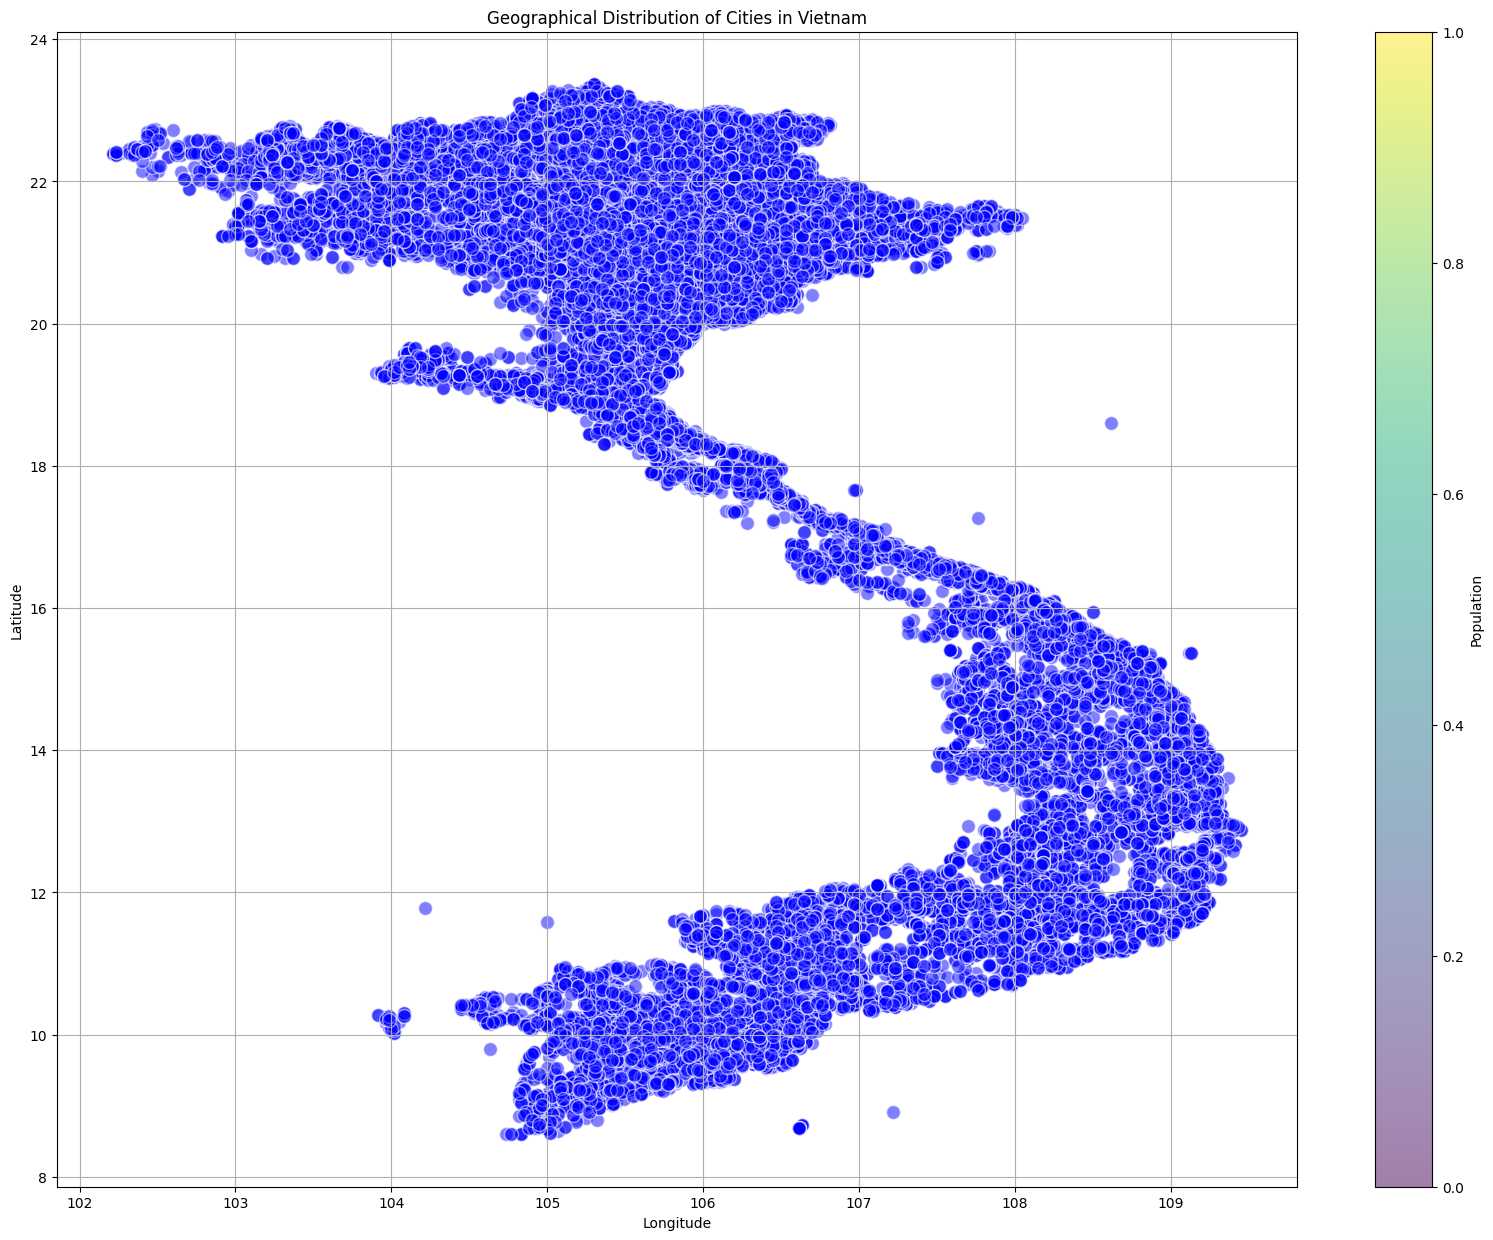

In [21]:
import matplotlib as mpl
print("- matplotlib:", mpl.__version__)

import urllib.request as urllib, zipfile, os

url = 'https://github.com/CODAIT/redrock/raw/master/twitter-decahose/src/main/resources/Location/'
filename = 'worldcitiespop.txt.gz'
datafolder = 'data/'

downloaded = urllib.urlopen(url + filename)
buf = downloaded.read()

try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

with open(datafolder + filename, 'wb') as f:
    f.write(buf)

cities = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')
vietnam_cities = cities[cities['Country'] == 'vn']  

vietnam_cities['Longitude'] = pd.to_numeric(vietnam_cities['Longitude'], errors='coerce')
vietnam_cities['Latitude'] = pd.to_numeric(vietnam_cities['Latitude'], errors='coerce')
vietnam_cities = vietnam_cities.dropna(subset=['Longitude', 'Latitude'])

longitude_columns = vietnam_cities['Longitude']
latitude_columns = vietnam_cities['Latitude']

plt.figure(figsize=(20, 15))
scatter = plt.scatter(longitude_columns, latitude_columns, alpha=0.5, c='blue', edgecolors='w', s=100 )
plt.title('Geographical Distribution of Cities in Vietnam')
plt.colorbar(scatter, label='Population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()